##3.Dimensionality reduction
- The advancements in Data Science and Machine Learning have made it possible for us to solve several complex regression and classification problems.  However, the performance of all these ML models depends on the data fed to them. Thus, it is imperative that we provide our ML models with an optimal dataset.

- Now, one might think that the more data we provide to our model, the better it becomes – however, it is not the case. If we feed our model with an excessively large dataset (with a large no. of features/columns), it gives rise to the problem of overfitting, wherein the model starts getting influenced by outlier values and noise. This is called the **Curse of Dimensionality.**

- The following graph represents the change in model performance with the increase in the number of dimensions of the dataset. It can be observed that the model performance is best only at an option dimension, beyond which it starts decreasing.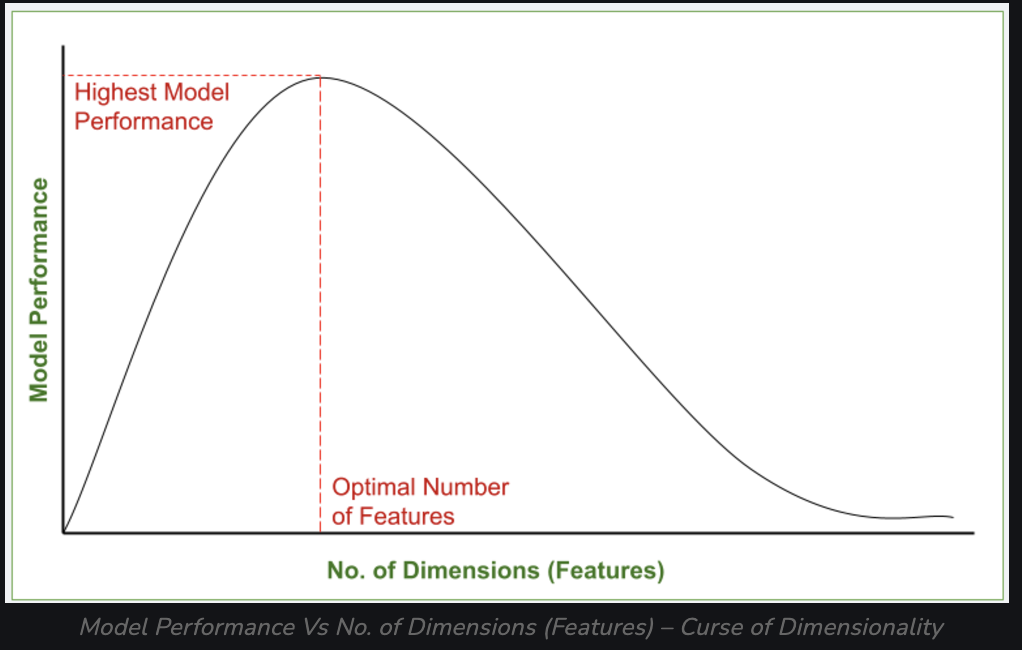

- Dimensionality Reduction reduces the number of features in a dataset to an optimal size. A common approach is Feature Extraction, which maps high-dimensional data to a lower-dimensional space, with Principal Component Analysis (PCA) being the most popular technique.


Step-1: Import necessary libraries

All the necessary libraries required to load the dataset, pre-process it and then apply PCA on it are mentioned below:

In [1]:
# Import necessary libraries
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

Step-2: Load the dataset

After importing all the necessary libraries, we need to load the dataset. Now, the iris dataset is already present in sklearn. First, we will load it and then convert it into a pandas data frame for ease of use.

In [2]:
#Load the Dataset
iris = datasets.load_iris()
#convert the dataset into a pandas data frame
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
#display the head (first 5 rows) of the dataset
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Step-3: Standardize the features

Before applying PCA or any other Machine Learning technique it is always considered good practice to standardize the data. For this, Standard Scalar is the most commonly used scalar. Standard Scalar is already present in sklearn. So, now we will standardize the feature set using Standard Scalar and store the scaled feature set as a pandas data frame.

In [3]:
#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df)) #scaling the data
scaled_data

0         1         2         3
0   -0.900681  1.019004 -1.340227 -1.315444
1   -1.143017 -0.131979 -1.340227 -1.315444
2   -1.385353  0.328414 -1.397064 -1.315444
3   -1.506521  0.098217 -1.283389 -1.315444
4   -1.021849  1.249201 -1.340227 -1.315444
..        ...       ...       ...       ...
145  1.038005 -0.131979  0.819596  1.448832
146  0.553333 -1.282963  0.705921  0.922303
147  0.795669 -0.131979  0.819596  1.053935
148  0.432165  0.788808  0.933271  1.448832
149  0.068662 -0.131979  0.762758  0.790671

[150 rows x 4 columns]

Step-3: Check the Co-relation between features without PCA (Optional)



Now, we will check the co-relation between our scaled dataset using a heat map. For this, we have already imported the seaborn library in Step-1. The correlation between various features is given by the corr() function and then the heat map is plotted by the heatmap() function. The colour scale on the side of the heatmap helps determine the magnitude of the co-relation. In our example, we can clearly see that a darker shade represents less co-relation while a lighter shade represents more co-relation. The diagonal of the heatmap represents the co-relation of a feature with itself – which is always 1.0, thus, the diagonal of the heatmap is of the highest shade.

<Axes: >

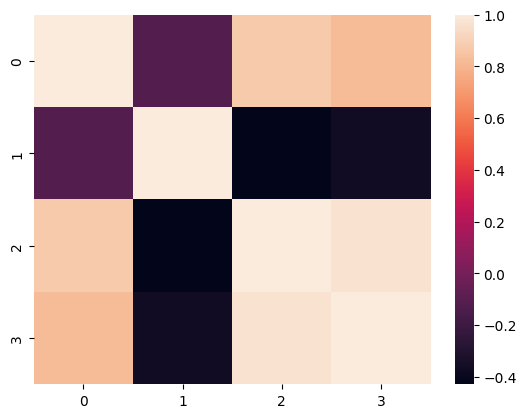

In [4]:
#Check the Co-relation between features without PCA
sns.heatmap(scaled_data.corr())

We can observe from the above heatmap that sepal length & petal length and petal length & petal width have high co-relation. Thus, we evidently need to apply dimensionality reduction. If you are already aware that your dataset needs dimensionality reduction – you can skip this step.

Step-4: Applying Principal Component Analysis



We will apply PCA on the scaled dataset. For this Python offers yet another in-built class called PCA which is present in sklearn.decomposition, which we have already imported in step-1. We need to create an object of PCA  and while doing so we also need to initialize n_components – which is the number of principal components we want in our final dataset. Here, we have taken n_components = 3, which means our final feature set will have 3 columns. We fit our scaled data to the PCA object which gives us our reduced dataset.

In [5]:
#Applying PCA
#Taking no. of Principal Components as 3
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

PC1       PC2       PC3
0 -2.264703  0.480027  0.127706
1 -2.080961 -0.674134  0.234609
2 -2.364229 -0.341908 -0.044201
3 -2.299384 -0.597395 -0.091290
4 -2.389842  0.646835 -0.015738

Step-5: Checking Co-relation between features after PCA

Now that we have applied PCA and obtained the reduced feature set, we will check the co-relation between various Principal Components, again by using a heatmap.

<Axes: >

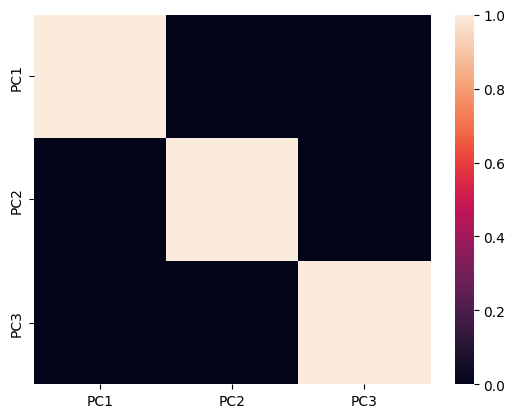

In [6]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())

The above heatmap clearly depicts that there is no correlation between various obtained principal components (PC1, PC2, and PC3). Thus, we have moved from higher dimensional feature space to a lower-dimensional feature space while ensuring that there is no correlation between the so obtained PCs is minimum. Hence, we have accomplished the objectives of PCA.